In [ ]:
#link for dataset
#

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
fires=pd.read_csv('fires.csv')

In [3]:
fires.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


In [7]:
fires.describe(include='all')

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517,517,469.000000,496.000000,474.000000,515.000000,496.000000,487.000000,482.000000,485.000000,517.000000
unique,NaN,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,259.000000,4.669246,4.299807,NaN,NaN,90.580384,111.195363,550.673418,9.018835,18.884677,44.381930,4.021784,0.023093,12.847292
std,149.389312,2.313778,1.229900,NaN,NaN,5.698137,64.008450,246.061309,4.564890,5.748318,16.180372,1.794460,0.305532,63.655818
min,1.000000,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,NaN,NaN,90.200000,70.800000,441.200000,6.450000,15.475000,33.000000,2.700000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,NaN,NaN,92.800000,141.575000,713.900000,10.750000,22.725000,53.500000,4.900000,0.000000,6.570000


In [8]:
#Let's see the month and day columns

In [9]:
fires['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [10]:
fires['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [11]:
#we can use the month column, because of the weather is dependent on the season period if it the summer or winter..etc

In [12]:
#we give a simple number for each month, and we can drop the day column

In [18]:
fires['month']=fires['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}, regex=True)

In [19]:
fires['month'].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11])

In [21]:
fires.drop('day', axis=1)

,Unnamed: 0,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,3,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.00
1,2,7,4,10,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,3,7,4,10,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.00
3,4,8,6,3,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,5,8,6,3,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,4,3,8,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,514,2,4,8,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,515,7,4,8,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,516,1,4,8,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


In [22]:
#we examine the missing values

In [28]:
fires.isnull().sum().sort_values(ascending=False)

FFMC          48
DC            43
wind          35
rain          32
RH            30
DMC           21
temp          21
ISI            2
Unnamed: 0     0
X              0
Y              0
month          0
day            0
area           0
dtype: int64

In [30]:
#before inputing or removing any rows/columns we try to analyze correlation with target columns

In [32]:
fires.corr()['area']

Unnamed: 0    0.077550
X             0.063385
Y             0.044873
month         0.056496
FFMC          0.042449
DMC           0.073768
DC            0.046118
ISI           0.008417
temp          0.097828
RH           -0.077766
wind          0.007474
rain         -0.007981
area          1.000000
Name: area, dtype: float64

In [33]:
#we see a low correltion with all of the columns. we gonna examinate the target columns and try to transform it

In [35]:
fires['area'].value_counts(normalize=True)

0.00      0.477756
1.94      0.005803
0.52      0.003868
3.71      0.003868
0.68      0.003868
            ...   
105.66    0.001934
154.88    0.001934
196.48    0.001934
200.94    0.001934
11.16     0.001934
Name: area, Length: 251, dtype: float64

In [ ]:
#47% of the column is null value

In [48]:
import matplotlib.pyplot as plt

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

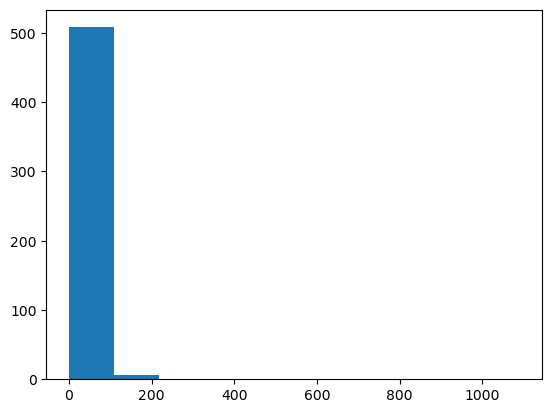

In [28]:
plt.hist(fires['area'])

In [36]:
#clearly the target is very skewed, we can use logarithm 

In [37]:
import numpy as np

In [43]:
fires['log_area']=np.log(fires['area']+2)

In [46]:
#we add +2 because to avoid error on null values
#let's analyze our new column

In [45]:
fires['log_area'].value_counts(normalize=True)

0.693147    0.477756
1.371181    0.005803
0.924259    0.003868
1.742219    0.003868
0.985817    0.003868
              ...   
4.678978    0.001934
5.055481    0.001934
5.290688    0.001934
5.312910    0.001934
2.577182    0.001934
Name: log_area, Length: 251, dtype: float64

(array([302.,  64.,  70.,  24.,  29.,  14.,   6.,   6.,   0.,   2.]),
 array([0.69314718, 1.32348597, 1.95382476, 2.58416355, 3.21450234,
        3.84484114, 4.47517993, 5.10551872, 5.73585751, 6.3661963 ,
        6.99653509]),
 <BarContainer object of 10 artists>)

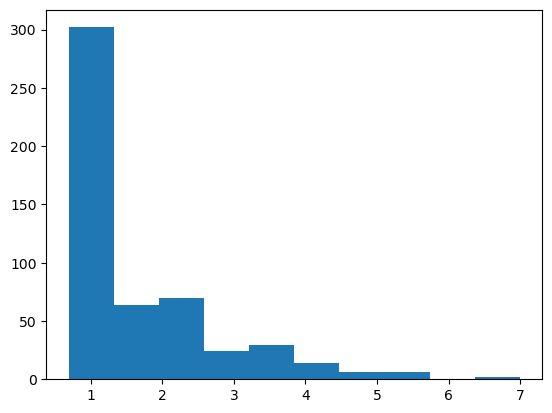

In [49]:
plt.hist(fires['log_area'])

In [50]:
#it's better in a way of less skewed

In [52]:
fires.corr()['log_area'].sort_values()

RH           -0.056263
ISI          -0.011064
rain          0.019818
Y             0.035322
temp          0.046815
FFMC          0.048559
wind          0.058476
X             0.062092
DC            0.062799
DMC           0.073168
month         0.109968
Unnamed: 0    0.270458
area          0.569387
log_area      1.000000
Name: log_area, dtype: float64

In [53]:
#we try now to prepare the others columns and managing the issing values

In [54]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    int64  
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
 14  log_area    517 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 60.7+ KB


In [55]:
col_missing=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain']  

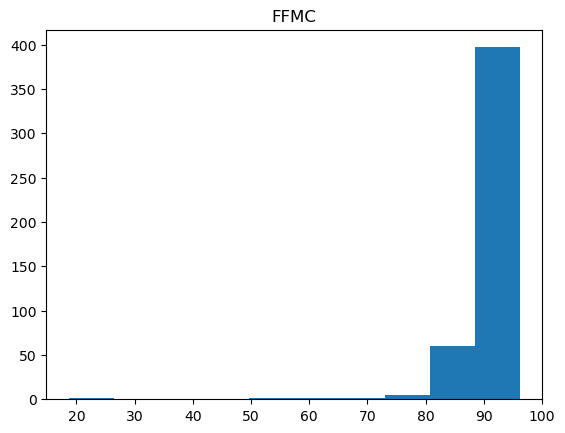

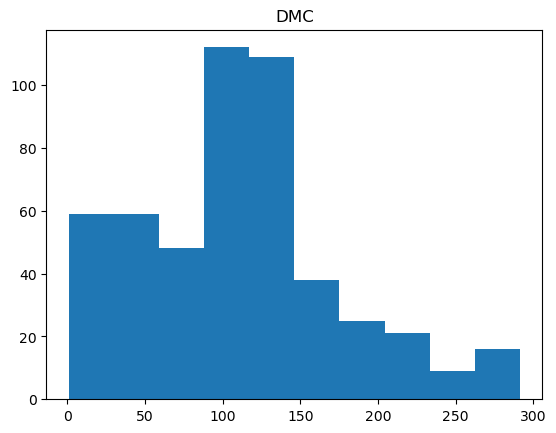

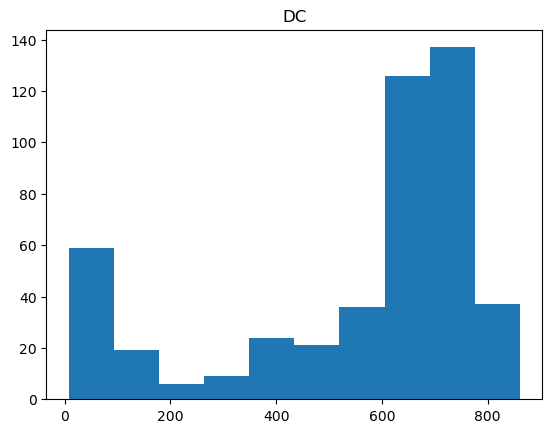

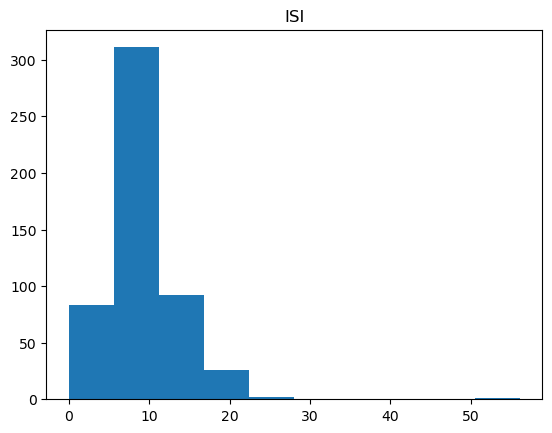

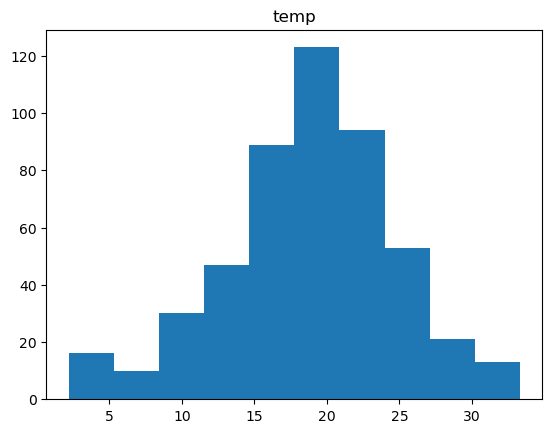

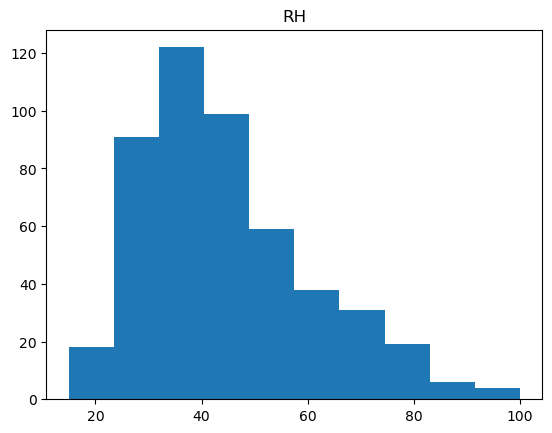

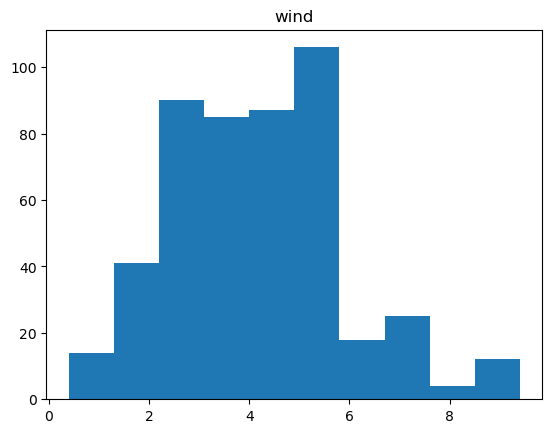

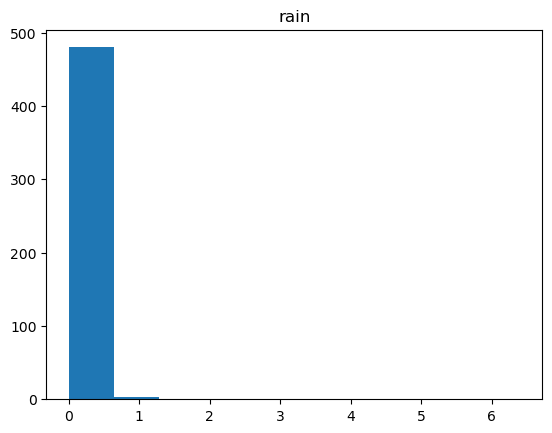

In [56]:
for c in col_missing:
    plt.hist(fires[c])
    plt.title(c)
    plt.show()

In [58]:
# we remove rain, ISI, and DMC columns because of very skewed distribution, mising values and low correlation with target columns

In [73]:
fires.drop(['ISI', 'rain', 'FFMC'], axis=1, inplace=True)

In [60]:
#we inspect more deeply the resting columns

In [61]:
col_missing_up=['DMC', 'DC', 'temp', 'RH', 'wind']  

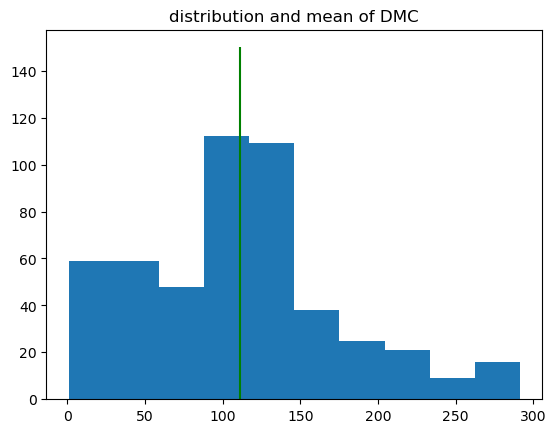

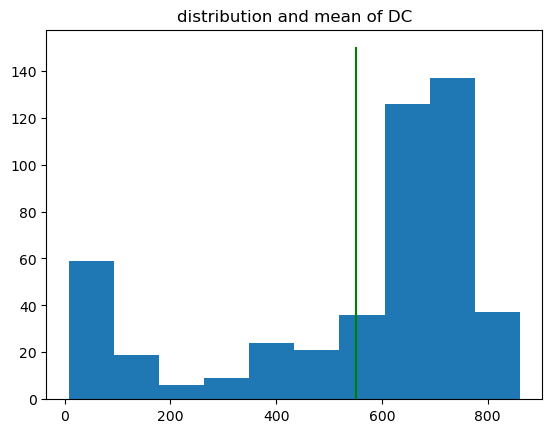

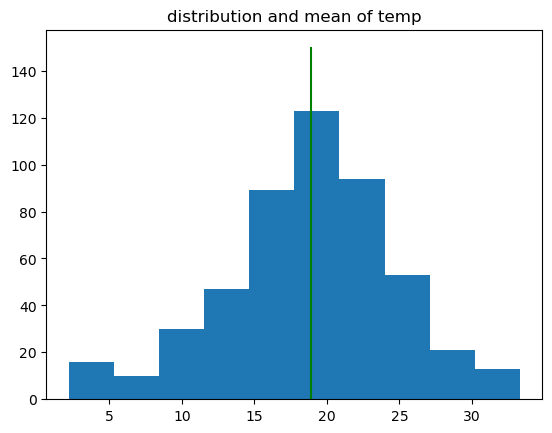

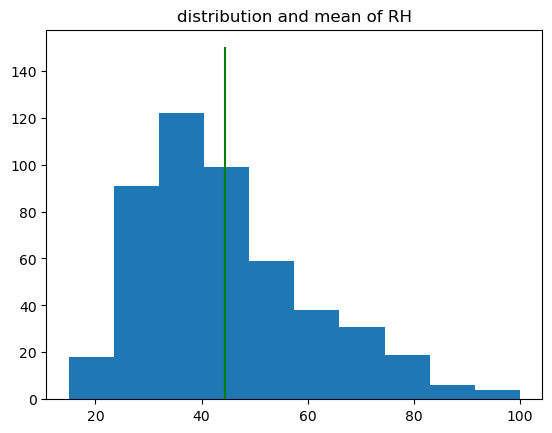

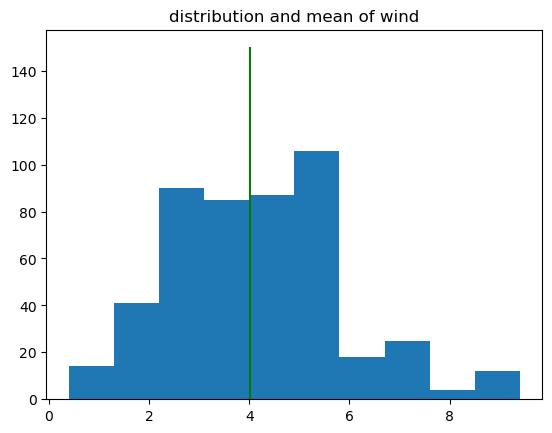

In [69]:
for c in col_missing_up:
    plt.hist(fires[c])
    plt.vlines(fires[c].mean(), ymin=0, ymax=150, color='green')
    plt.title('distribution and mean of '+c)
    plt.show()
               

In [70]:
# as we see the mean can be a good candidate for inputing the missing values

In [71]:
for c in col_missing_up:
    fires[c].fillna(fires[c].mean(), inplace=True)

In [74]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    int64  
 4   day         517 non-null    object 
 5   DMC         517 non-null    float64
 6   DC          517 non-null    float64
 7   temp        517 non-null    float64
 8   RH          517 non-null    float64
 9   wind        517 non-null    float64
 10  area        517 non-null    float64
 11  log_area    517 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 48.6+ KB


In [77]:
#we inspect the outliers with boxplot
#before that we drop Unnamed: 0 , X, and Y columns

In [84]:
fires.drop(['Unnamed: 0', 'X', 'Y', 'area', 'day'], axis=1, inplace=True)

In [88]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    int64  
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   temp      517 non-null    float64
 4   RH        517 non-null    float64
 5   wind      517 non-null    float64
 6   log_area  517 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 28.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    int64  
 1   day       517 non-null    object 
 2   DMC       517 non-null    float64
 3   DC        517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    float64
 6   wind      517 non-null    float64
 7   log_area  517 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 32.4+ KB


In [89]:
X=fires.drop('log_area', axis=1)
y=fires['log_area']

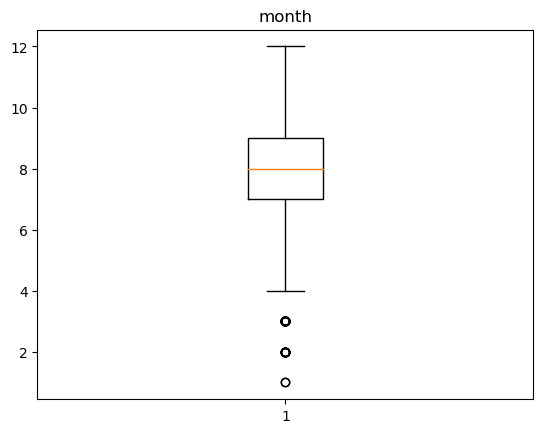

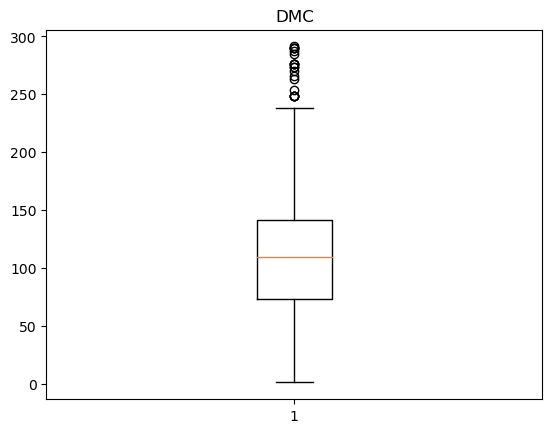

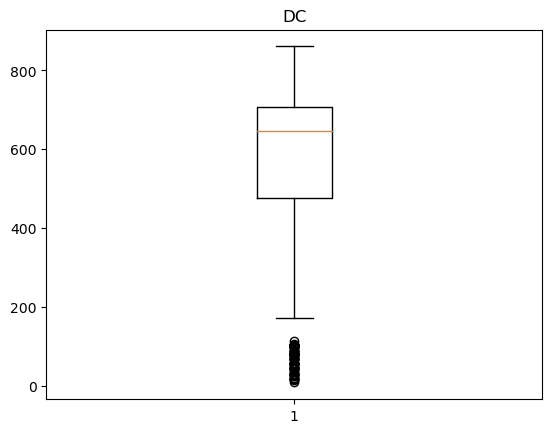

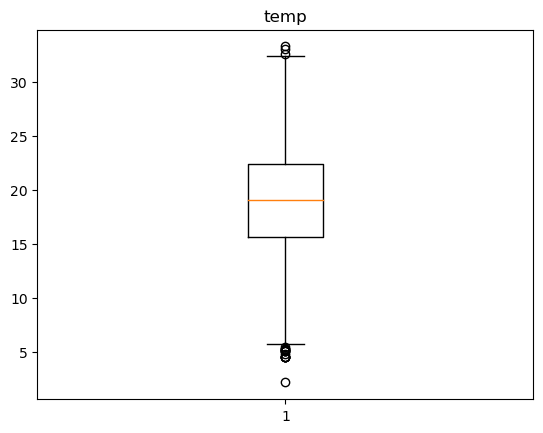

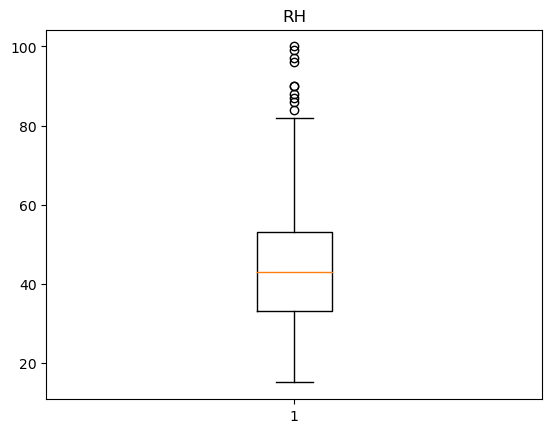

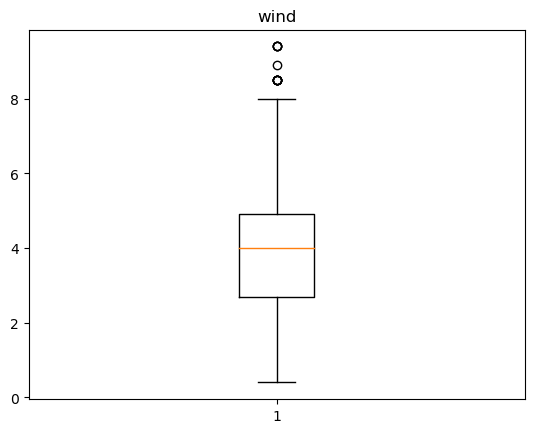

In [90]:
for c in X.columns:
    plt.boxplot(fires[c])
    plt.title(c)
    plt.show()

In [91]:
fires.describe()

,month,DMC,DC,temp,RH,wind,log_area
count,517.000000,517.000000,517.000000,517.000000,517.00000,517.000000,517.000000
mean,7.475822,111.195363,550.673418,18.884677,44.38193,4.021784,1.535570
std,2.275990,62.692424,235.585767,5.630131,15.70297,1.732533,1.147147
min,1.000000,1.100000,7.900000,2.200000,15.00000,0.400000,0.693147
25%,7.000000,73.400000,474.900000,15.700000,33.00000,2.700000,0.693147
50%,8.000000,109.200000,647.100000,19.100000,43.00000,4.000000,0.924259
75%,9.000000,141.200000,706.400000,22.400000,53.00000,4.900000,2.148268
max,12.000000,291.300000,860.600000,33.300000,100.00000,9.400000,6.996535


In [93]:
#as we se for DC, DMC and RH columns we see clearly many outliers that we have to handling with
#we can keep these columns without changing or trimming

In [94]:
#let's now scale our features, we choose normal standardisation

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [98]:
#we use catterplot to see relationship with our target

In [103]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

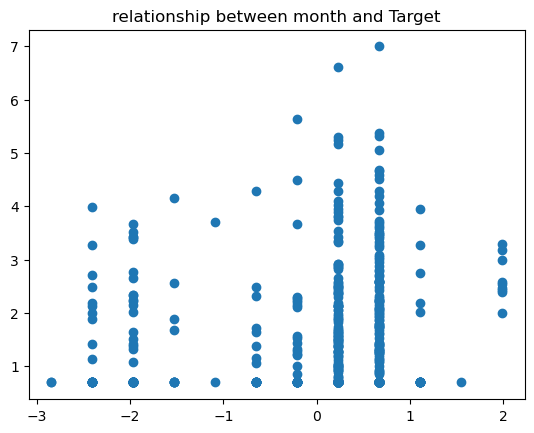

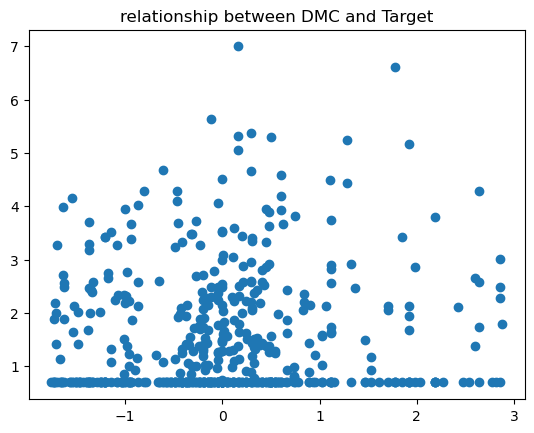

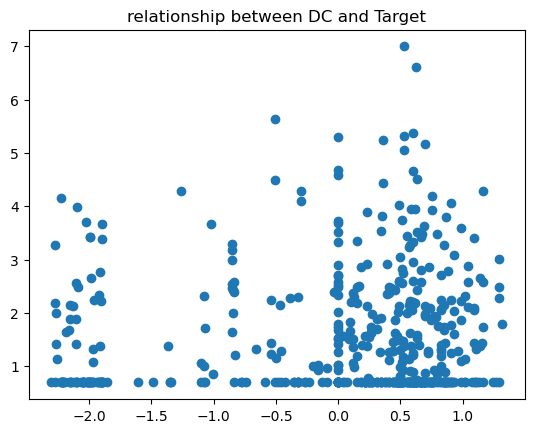

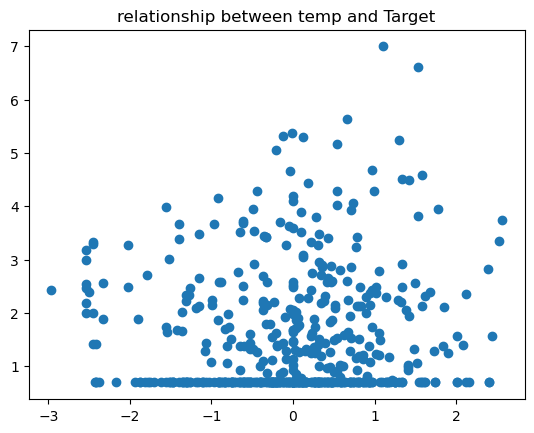

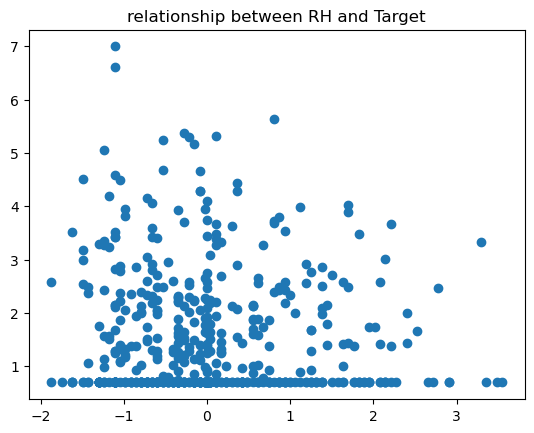

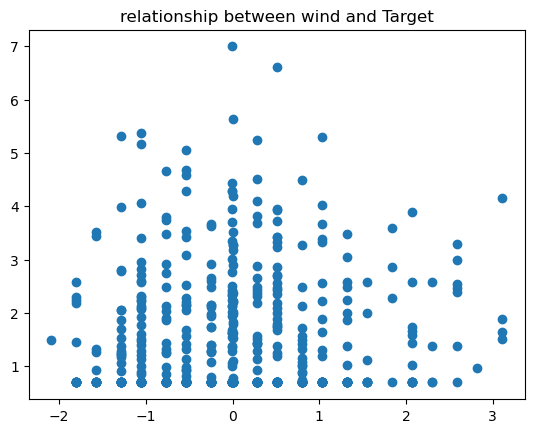

In [105]:
for c in X_scaled.columns:
    plt.scatter(X_scaled[c],y)
    plt.title('relationship between ' + c + ' and Target')
    plt.show()

In [106]:
#we don't find any relationship between feature and target

In [107]:
#we use feature selection bakward and forward method

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=22)

In [110]:
print(len(X_train), len(X_test))

413 104


In [113]:
from sklearn.feature_selection import SequentialFeatureSelector

In [185]:
model_for=SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', n_features_to_select='auto',tol=None)
model_for.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select='auto',
                          scoring='neg_mean_squared_error')

In [202]:
model_for.get_feature_names_out()

array(['month', 'DMC', 'DC'], dtype=object)

In [134]:
# the best model forward ethod gives us the first 3 clumns as features selection

In [203]:
model_for_reg=LinearRegression().fit(X_train[model_for.get_feature_names_out()], y_train)

In [135]:
#let's call backward method

In [187]:
model_back=SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', direction='backward', n_features_to_select='auto',tol=None)
model_back.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select='auto',
                          scoring='neg_mean_squared_error')

In [188]:
model_back.support_

array([ True,  True,  True, False, False, False])

In [189]:
# the backward method gives us the same columns as forward method

In [204]:
model_back_reg=LinearRegression().fit(X_train[model_back.get_feature_names_out()], y_train)

In [142]:
#in this section we try to use LASSO method
#we use gridsearchcv to find the best alpha

In [162]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

In [148]:
lasso_gs=GridSearchCV(Lasso(), param_grid={'alpha':np.arange(0.00001,10,200)})

In [149]:
lasso_gs.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': array([1.e-05])})

In [150]:
lasso_gs.best_params_

{'alpha': 1e-05}

In [154]:
lasso1=Lasso(alpha=lasso_gs.best_params_['alpha'])

In [155]:
lasso1.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [158]:
lasso1_coef=np.abs(lasso1.coef_)

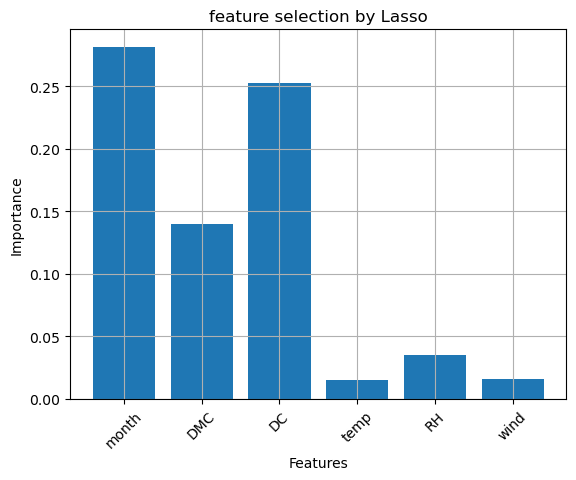

In [160]:
plt.bar(X_train.columns, lasso1_coef)
plt.xticks(rotation=45)
plt.title('feature selection by Lasso')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [161]:
#we try to analyze the Ridge method

In [163]:
ridge_gs=GridSearchCV(Ridge(), param_grid={'alpha':np.arange(0.00001,10,200)})

In [164]:
ridge_gs.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([1.e-05])})

In [165]:
ridge_gs.best_params_

{'alpha': 1e-05}

In [166]:
ridge1=Ridge(alpha=0.00001)

In [167]:
ridge1.fit(X_train, y_train)

Ridge(alpha=1e-05)

In [169]:
ridge1_coef=np.abs(ridge1.coef_)

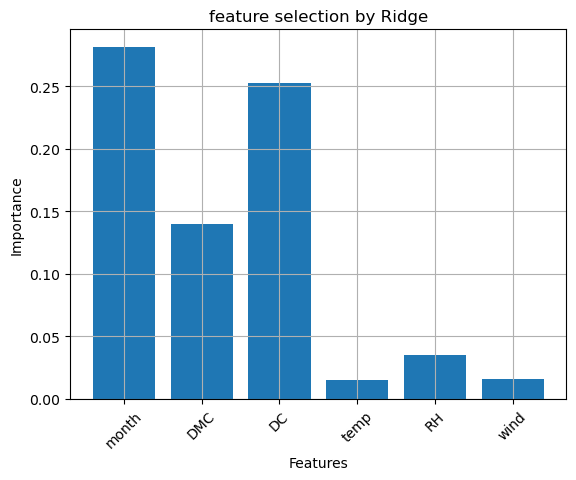

In [170]:
plt.bar(X_train.columns, ridge1_coef)
plt.xticks(rotation=45)
plt.title('feature selection by Ridge')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [171]:
# as we see we get the same plot, for now the best features are month, DMC, and DC

In [198]:
ridge_gs

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([1.e-05])})

In [181]:
#in this section we use K-Fold CV through all the models

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
#create a dictionnary for all models

In [205]:
models={'Reference':(LinearRegression(), X_train[['wind', 'temp']]),
        'Forward':(model_for_reg, X_train[model_for.get_feature_names_out()]),
        'Backward':(model_back_reg, X_train[model_back.get_feature_names_out()]),
        'Ridge':(ridge_gs, X_train),
        'Lasso':(lasso_gs, X_train)
       }

In [209]:
results={}
for name, (model, data) in models.items():
    cv_scores=cross_val_score(model,data, y_train, cv=10, scoring='neg_mean_squared_error')
    results[name]=cv_scores

In [218]:
model_performance=pd.DataFrame(columns=['Model', 'Average mse', 'STD mse'])

In [219]:
for name, scor in results.items():
    line=pd.DataFrame({'Model':[name], 'Average mse':[scor.mean()], 'STD mse':scor.std()})
    model_performance=pd.concat([model_performance,line], ignore_index=True)
    

In [221]:
model_performance

,Model,Average mse,STD mse
0,Reference,-1.344559,0.293111
1,Forward,-1.318842,0.293177
2,Backward,-1.318842,0.293177
3,Ridge,-1.331587,0.2957
4,Lasso,-1.331581,0.295698


In [222]:
#we see no great differences between models, but we can select forward or backward model ( they gives he same results)

In [223]:
#we make prediction on the test set

In [225]:
y_pred=model_back_reg.predict(X_test[model_back.get_feature_names_out()])

In [226]:
# we calculate the residuals 

In [227]:
residuals=y_pred-y_test

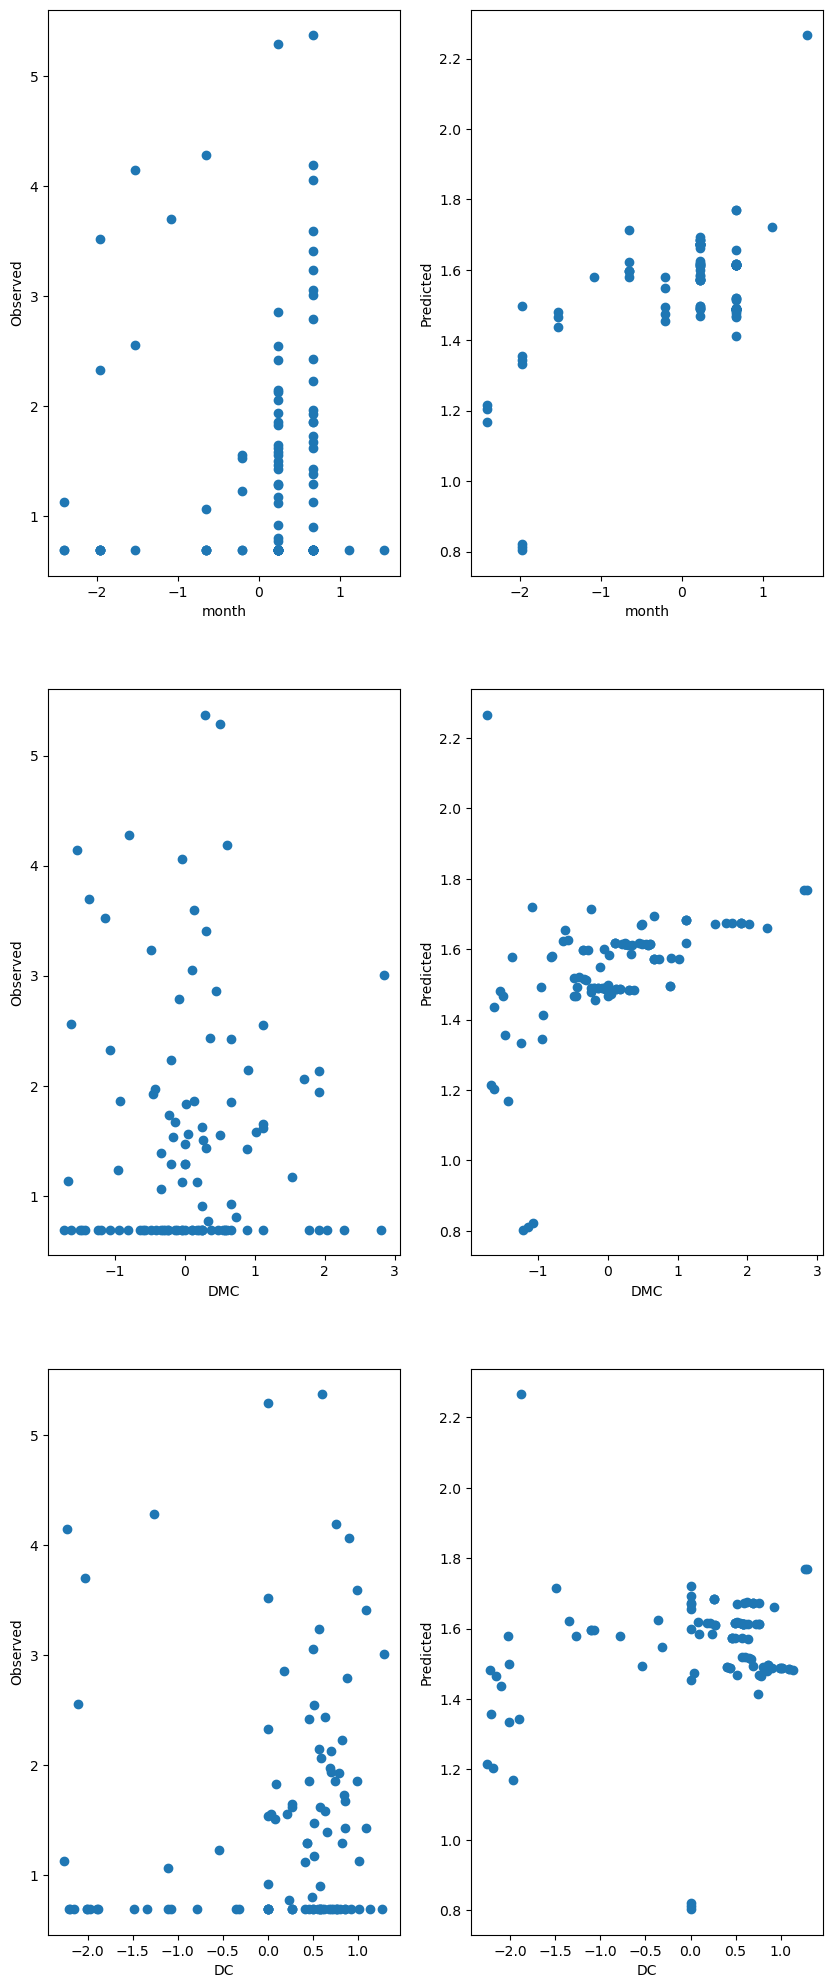

In [229]:
# Plot the observed values, predicted values
fig, axs = plt.subplots(nrows=len(model_back.get_feature_names_out()), ncols=2, figsize=(10, 25))

for i, feat in enumerate(model_back.get_feature_names_out()):
    axs[i, 0].scatter(X_test[feat], y_test)
    axs[i, 0].set_xlabel(feat)
    axs[i, 0].set_ylabel('Observed')
    
    axs[i, 1].scatter(X_test[feat], y_pred)
    axs[i, 1].set_xlabel(feat)
    axs[i, 1].set_ylabel('Predicted')

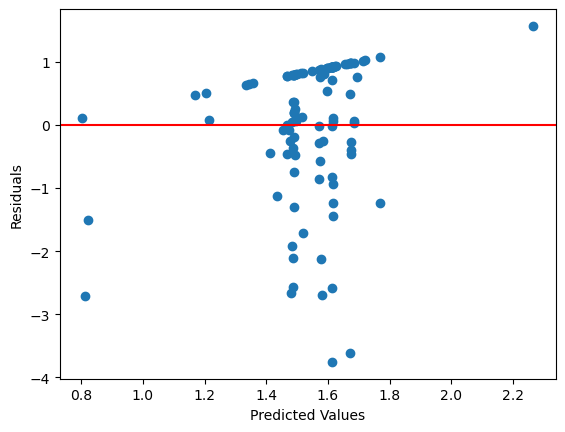

In [230]:
# Plot the residuals as a function of predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.show()